#### Оценка неопределенности с помощью моделирования

Одно из преимуществ традиционного статистического подхода к анализу временных рядов состоит в том, что в нем оценка неопределенности рассчитывается согласно строгим аналитическим формулам. Однако даже в таких случаях — и, само собой, в случае нестатистических методов анализа — бывает полезно рассмотреть неопределенность, обусловленную моделью прогнозирования, с помощью вычислительных методов. Один из интуитивно понятных и доступных для расчетов способов сделать это — простое моделирование.
После подгонки модели нужно понять, насколько изменчивой может быть оценка коэффициента  . В подобных случаях, чтобы узнать это, процесс многократно моделируется по методу Монте-Карло. Такая задача легко выполняется с помощью инструментов языка R, учитывая все, что нам известно об AR-процессах из раздела 5.


In [1]:
require (forecast)

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”


In [2]:
require (png)

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”


In [3]:
phi <- 0.7

In [5]:
N <- 1000

In [6]:
time_steps <- 24

In [7]:
sigma_error <- 1

In [8]:
sd_series <- sigma_error / (1 - phi)

In [9]:
starts <- rnorm(N, sd = sqrt (sd_series))

In [10]:
estimates <- numeric(N)

In [11]:
res <- numeric(time_steps)

In [12]:
for (i in 1:N) {
 errs <- rnorm(time_steps, sd = sigma_error)
 res[1] <- starts[i] + errs[1]

 for (t in 2:time_steps) {
  res[t] <- phi * res[t-1] + errs[t]
 }
 estimates[i] <- arima(res, order = c(1, 0, 0))$coef[1]
}

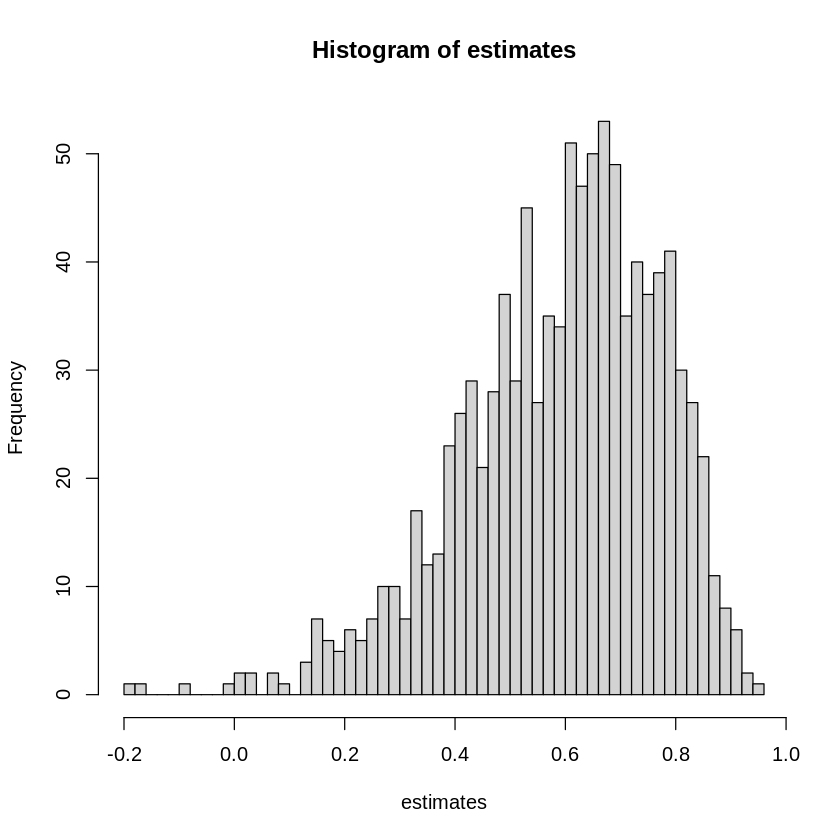

In [13]:
hist(estimates,
 breaks = 50)

В качестве результата выводится гистограмма оценки коэффициента fi

Кроме того, можно получить представление о диапазоне оценок и квантилей, воспользовавшись функцией summary (), примененной к оценкам.

In [14]:
summary (estimates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1920  0.4829  0.6186  0.5928  0.7263  0.9563 

Мы также можем обратиться к методам бутсрэпа, чтобы получить ответы на более сложные вопросы. Предположим, что нужно знать, какие вычислительные затраты связаны с упрощением модели относительно исходного варианта. Пусть изучаемый процесс представлен как AR(2), хотя исходно мы определили его как AR(1). Чтобы выяснить, как это сказывается на оценке модели, модифицируем предыдущий код R следующим образом.

In [15]:
## Допустим, что истинный процесс - AR(2) ,

In [16]:
## но ввиду его высокой сложности переключаемся на arima. sim

In [17]:
phi_1 <- 0.7

In [18]:
phi_2 <- -0.2

In [19]:
estimates <- numeric(N)

In [20]:
for (i in 1:N) {
    res <- arima.sim(list (order = c(2,0,0),
    ar = c(phi_1, phi_2)),
    n = time_steps)
    estimates [i] <- arima(res, c(1, 0, 0))$coef[1]
}


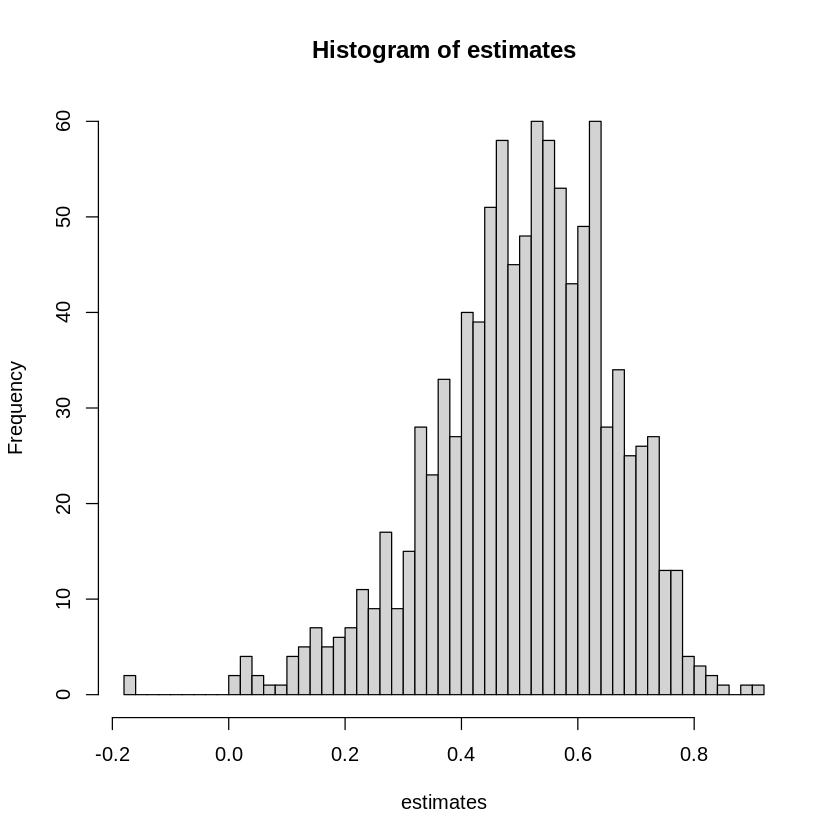

In [21]:
hist(estimates,
 breaks = 50)

Вам может показаться, что распределения не так уж и сильно различаются, и будете правы. Это подтверждается описательными статистиками (Будет ли плохое приближение проблемой, зависит от конкретных коэффициентов. В данном случае влияние неправильного выбора модели оказалось незначительным, но в других случаях оно может быть катастрофическим).

In [22]:
summary (estimates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1617  0.4171  0.5209  0.5051  0.6135  0.9053 

Легко видеть, что диапазон оценок шире для правильно определенной модели, а оценка для члена первого порядка несколько хуже, чем для правильно заданной модели, но отклонение не слишком велико.